In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [20]:
data = pd.read_csv('Apple_Store_Reviews.csv')
data.head()

,Review_ID,App_Name,User_Age,Review_Date,Rating,Review_Text,Likes,Device_Type,Version_Used,Country,Purchase_Amount,Category
0,1,Candy Crush Saga,21,2023-01-16,4,"Great game, but too many in-game purchases.",70,iPhone 12,3.231.19,Australia,0.00,Games
1,2,Spotify,57,2024-02-01,1,"Good, but has connection issues sometimes.",49,iPhone SE,4.102.9,Germany,7.15,Music
2,3,TikTok,33,2023-11-30,5,Awesome app! Best entertainment content.,98,iPhone 12,7.52.0,Germany,4.98,Entertainment
3,4,Audible,40,2023-04-03,5,"Great app, but it's a bit pricey.",74,iPhone 13,5.260.15,Australia,0.00,Books
4,5,Spotify,44,2023-05-01,1,"Good, but has connection issues sometimes.",47,iPhone SE,4.50.18,Australia,14.31,Music


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Review_ID        1000 non-null   int64  
 1   App_Name         1000 non-null   object 
 2   User_Age         1000 non-null   int64  
 3   Review_Date      1000 non-null   object 
 4   Rating           1000 non-null   int64  
 5   Review_Text      1000 non-null   object 
 6   Likes            1000 non-null   int64  
 7   Device_Type      1000 non-null   object 
 8   Version_Used     1000 non-null   object 
 9   Country          1000 non-null   object 
 10  Purchase_Amount  1000 non-null   float64
 11  Category         1000 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 93.9+ KB


In [22]:
data.describe()

,Review_ID,User_Age,Rating,Likes,Purchase_Amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,39.211000,2.869000,44.776000,5.361120
std,288.819436,11.908917,1.467649,28.685444,5.755652
min,1.000000,18.000000,1.000000,0.000000,0.000000
25%,250.750000,30.000000,1.000000,17.000000,0.000000
50%,500.500000,39.000000,3.000000,42.500000,4.995000
75%,750.250000,49.000000,4.000000,71.000000,10.192500
max,1000.000000,60.000000,5.000000,100.000000,19.970000


In [23]:
data.isnull().sum()

Review_ID          0
App_Name           0
User_Age           0
Review_Date        0
Rating             0
Review_Text        0
Likes              0
Device_Type        0
Version_Used       0
Country            0
Purchase_Amount    0
Category           0
dtype: int64

In [24]:
mean = data['Rating'].mean()
print(mean)

2.869


In [25]:
median = data['Rating'].median()
print(median)

3.0


In [26]:
mode = data['Rating'].mode()[0]
print(mode)

1


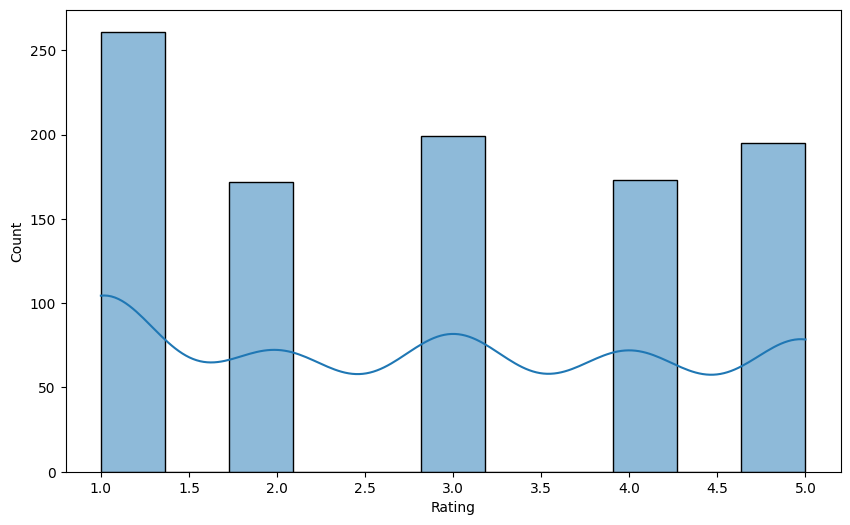

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(data['Rating'], kde = True)
plt.savefig('images/ratings-analysis.jpg')
plt.show()

In the above distribution, **Median** is likely the best choice for central tendency, as it balances the skew and the multiple peaks.

In [28]:
purchase_amount = data['Purchase_Amount']
range_purchase_amount = purchase_amount.max() - purchase_amount.min()
print(range_purchase_amount)

19.97


In [29]:
Q1 = np.percentile(purchase_amount, 25)
Q3 = np.percentile(purchase_amount, 75)

IQR = (Q3 - Q1).round(2)
print(IQR)

10.19


The range tells you the total span of values in the Purchase_Amount column.
A large range indicates a wide spread between the lowest and highest purchase amounts, while a small range indicates a more concentrated set of values.

Whereas,

The IQR is useful because it focuses on the middle 50% of the data, ignoring outliers. It tells you how spread out the central portion of the data is.
A small IQR indicates that the values are concentrated around the median, while a large IQR suggests a more dispersed dataset.

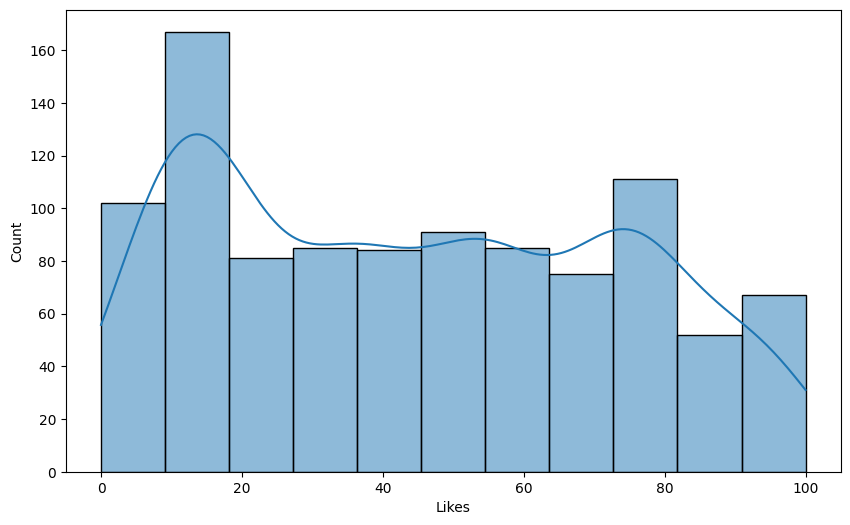

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(data['Likes'], kde = True)
plt.savefig('images/likes-received.jpg')
plt.show()

In [33]:
variance = data['Likes'].var().round(2)
print(variance)

822.85


In [34]:
std_dev = data['Likes'].std().round(2)
print(std_dev)

28.69


A small standard deviation means that the likes are closely packed around the mean, indicating less variability.
A large standard deviation means that the likes are spread out over a larger range, indicating greater variability in how many likes are received.

In [35]:
corr = data['Likes'].corr(data['Rating']).round(4)
print(corr)

0.8425


0.8425 suggests a strong positive correlation between Likes and Rating

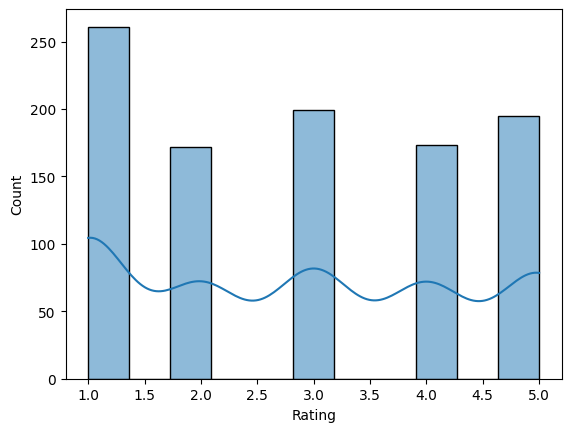

In [36]:
sns.histplot(data['Rating'], kde=True)
plt.show()

The distribution is not clearly skewed in a traditional sense (positive or negative), but it suggests that there are two distinct groups of user ratings:<br>

Positive feedback: Many users are highly satisfied (5.0 rating).<br>
Negative feedback: A significant number of users are dissatisfied (1.0 rating).<br>

User Satisfaction: The presence of peaks at both extremes of the scale suggests a polarized user base.<br>

In [37]:
instagram_ratings = data[data['App_Name'] == 'Instagram']['Rating']
whatsapp_ratings = data[data['App_Name'] == 'WhatsApp']['Rating']

In [38]:
t_stat, p_value = stats.ttest_ind(instagram_ratings, whatsapp_ratings, alternative='greater')
t_stat, p_value = t_stat.round(4), p_value.round(4)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Instagram's average rating is significantly higher than WhatsApp's.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the ratings.")

T-statistic: -0.7967
P-value: 0.7868
Fail to reject the null hypothesis: No significant difference between the ratings.


User satisfaction levels, as represented by the ratings, do not differ significantly between the two platforms based on the given data.

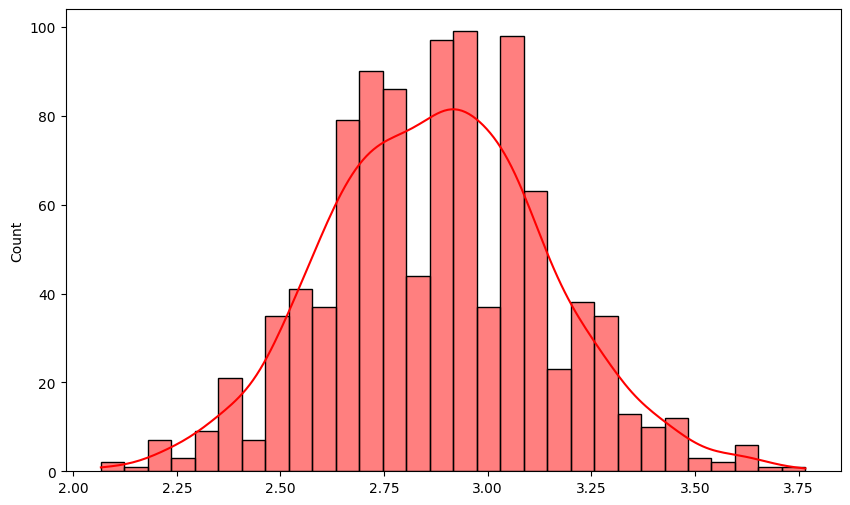

In [41]:
ratings = data['Rating']

sample_size = 30
num_samples = 1000

sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(ratings, size=sample_size, replace=True)
    sample_means.append(np.mean(sample))
plt.figure(figsize=(10,6))
sns.histplot(sample_means, bins=30, kde=True, color='red', edgecolor='black')
plt.savefig('images/clt.jpg')
plt.show()

The Central Limit Theorem explains why the sampling distribution of sample means tends to be normal, regardless of the population distribution.
This property is crucial for inferential statistics because it allows us to use the normal distribution to make predictions and calculate probabilities about sample means.